# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Parameter Estimation<br>
Section 2: Probabilities of Interest

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [2]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [3]:
data = read.csv(file = "data/BOULDER_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [4]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 165

Check number of years in the data set.

In [5]:
firstYear

[1] 1898

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 116

In [6]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
117 117 117 117 117 117 117 117 117 117 117 117 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [7]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

In [8]:
data2 = data

In [9]:
data2$Max.PRCP.[1389]=NA

In [10]:
#create the first decade (first year and the following 9 years)
max_PRCP2 = data.frame(data2[which(data2$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
# i.e. 1898-1907, 1898-1908, etc
for(year in c((data2$YEAR[1] + 1):2005)){
    max_PRCP2 = cbind(max_PRCP2,data2[which(data2$YEAR >= year & data2$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP2) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP2[max_PRCP2==-999] = NA

## Section 1: Parameter Estimation

In [11]:
options(repr.plot.width=9, repr.plot.height=8) #reduces the plot sizes

In [12]:
mleGamma = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mle")
   mleGamma[i,1] = gamma1$estimate[1]
   mleGamma[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma[i,3] = gof$ks
   mleGamma[i,4] = gof$kstest
   mleGamma[i,5] = gof$cvm
   mleGamma[i,6] = gof$cvmtest
   mleGamma[i,7] = gof$ad
   mleGamma[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [13]:
mleExp = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp[i,2] = gof$ks
   mleExp[i,3] = gof$kstest
   mleExp[i,4] = gof$cvm
   mleExp[i,5] = gof$cvmtest
   mleExp[i,6] = gof$ad
   mleExp[i,7] = gof$adtest
}

mleExp["mean"] = 1/mleExp$theta
mleExp["square"] = mleExp$theta^2 
mleExp["var"] = 1/mleExp$square
mleExp["sd"] = sqrt(mleExp$var)

In [14]:
mleWB = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")
   mleWB[i,1] = WB1$estimate[1]
   mleWB[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB[i,3] = gof$ks
   mleWB[i,4] = gof$kstest
   mleWB[i,5] = gof$cvm
   mleWB[i,6] = gof$cvmtest
   mleWB[i,7] = gof$ad
   mleWB[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [15]:
testDist = na.omit(max_PRCP[,i]) 
WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")

In [16]:
WB1$estimate

shape      scale 
  1.129744 203.264967

In [17]:
head(mleWB)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest
0.9342517,142.2166,0.12730628,rejected,0.4742499,rejected,3.707979,rejected
0.9107144,144.4591,0.11067741,not rejected,0.3795635,rejected,3.230740,rejected
0.9519022,159.4062,0.08502454,not rejected,0.2389996,rejected,2.043397,rejected
0.9501697,163.2204,0.10160884,not rejected,0.3156017,rejected,2.463023,rejected
1.0525052,169.3910,0.09370523,not rejected,0.1923029,rejected,1.512999,rejected
1.0191651,166.8905,0.10026129,not rejected,0.1730852,rejected,1.418072,rejected


In [18]:
which(mleWB$KStest=="rejected")

[1]  1  7  8 13 14 15 16 21 27 28 29 43 44 45 46

In [19]:
table(mleWB$KStest)
table(mleExp$KStest)
table(mleGamma$KStest)


not rejected     rejected 
          93           15 


not rejected     rejected 
          62           46 


not rejected     rejected 
          71           37 

In [20]:
which(mleGamma$KStest=="rejected")

[1]  1  2  7  8  9 12 13 14 15 16 17 18 19 20 21 22 25 26 27 28 29 30 31 32 33
[26] 34 35 36 39 40 41 42 43 44 45 46 47

In [21]:
which(mleExp$KStest=="rejected")

[1]  13  14  21  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
[20]  55  56  57  61  62  67  68  69  70  73  74  75  76  81  82  83  87  95  98
[39] 100 101 102 103 104 105 107 108

In [22]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7662871,0.005275478,0.1624008,rejected,0.8356680,NA,5.196257,NA,189.5563,145.2545,27533.91,165.9334
0.7426182,0.004984634,0.1442263,rejected,0.6983310,NA,4.539886,NA,200.6165,148.9815,29888.15,172.8819
0.8177342,0.005041738,0.1125168,not rejected,0.4371900,NA,2.975561,NA,198.3443,162.1929,32170.04,179.3601
0.7992070,0.004814416,0.1317502,not rejected,0.5563920,NA,3.534812,NA,207.7095,166.0029,34480.39,185.6889
0.9615450,0.005770623,0.1192384,not rejected,0.3512189,NA,2.309947,NA,173.2915,166.6276,28875.14,169.9269
0.9000838,0.005426620,0.1287402,not rejected,0.3326784,NA,2.205959,NA,184.2768,165.8645,30564.98,174.8284


In [23]:
head(mleExp)

theta,KS,KStest,CvM,CvMtest,AD,ADtest,mean,square,var,sd
0.006881695,0.10468826,not rejected,0.2941847,rejected,2.902581,rejected,145.3130,4.735772e-05,21115.88,145.3130
0.006714176,0.07942588,not rejected,0.1699337,not rejected,2.277768,rejected,148.9386,4.508016e-05,22182.71,148.9386
0.006167496,0.06812264,not rejected,0.1454369,not rejected,1.584073,rejected,162.1404,3.803801e-05,26289.49,162.1404
0.006024452,0.08463955,not rejected,0.2118668,not rejected,1.978488,rejected,165.9902,3.629402e-05,27552.75,165.9902
0.006003329,0.11109286,not rejected,0.2951964,rejected,2.030774,rejected,166.5743,3.603995e-05,27746.98,166.5743
0.006029810,0.10668369,not rejected,0.2043136,not rejected,1.575047,rejected,165.8427,3.635861e-05,27503.80,165.8427


In [24]:
trueEst = NULL
for(i in 1:nrow(mleExp)){
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"plot")
    }
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"exp")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"gamma")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"fail")
    }
}

In [25]:
table(trueEst)
print(table(mleWB$KStest))

trueEst
  exp  fail gamma  plot 
   25    12    34    37 


not rejected     rejected 
          93           15 


In [26]:
mleGamma[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE

In [27]:
mleExp[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[13] FALSE FALSE FALSE

In [28]:
which(mleWB$KStest=="rejected")

[1]  1  7  8 13 14 15 16 21 27 28 29 43 44 45 46

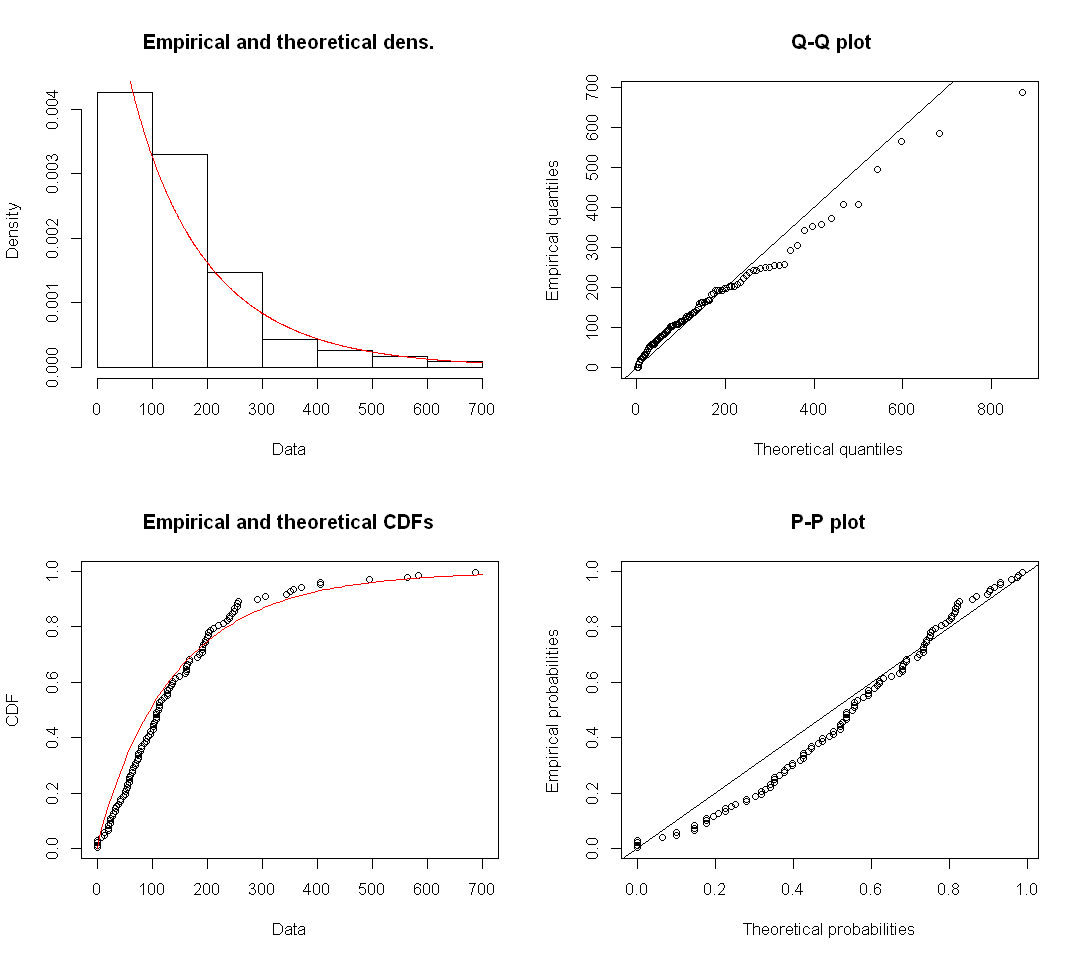

In [29]:
testDist = na.omit(max_PRCP2[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

plot(fitdist(as.vector(testDist),"weibull",method = "mle"))

In [30]:
mleGamma[1,"KStest"];mleExp[1,"KStest"];mleWB[1,"KStest"]

[1] "rejected"

[1] "not rejected"

[1] "rejected"

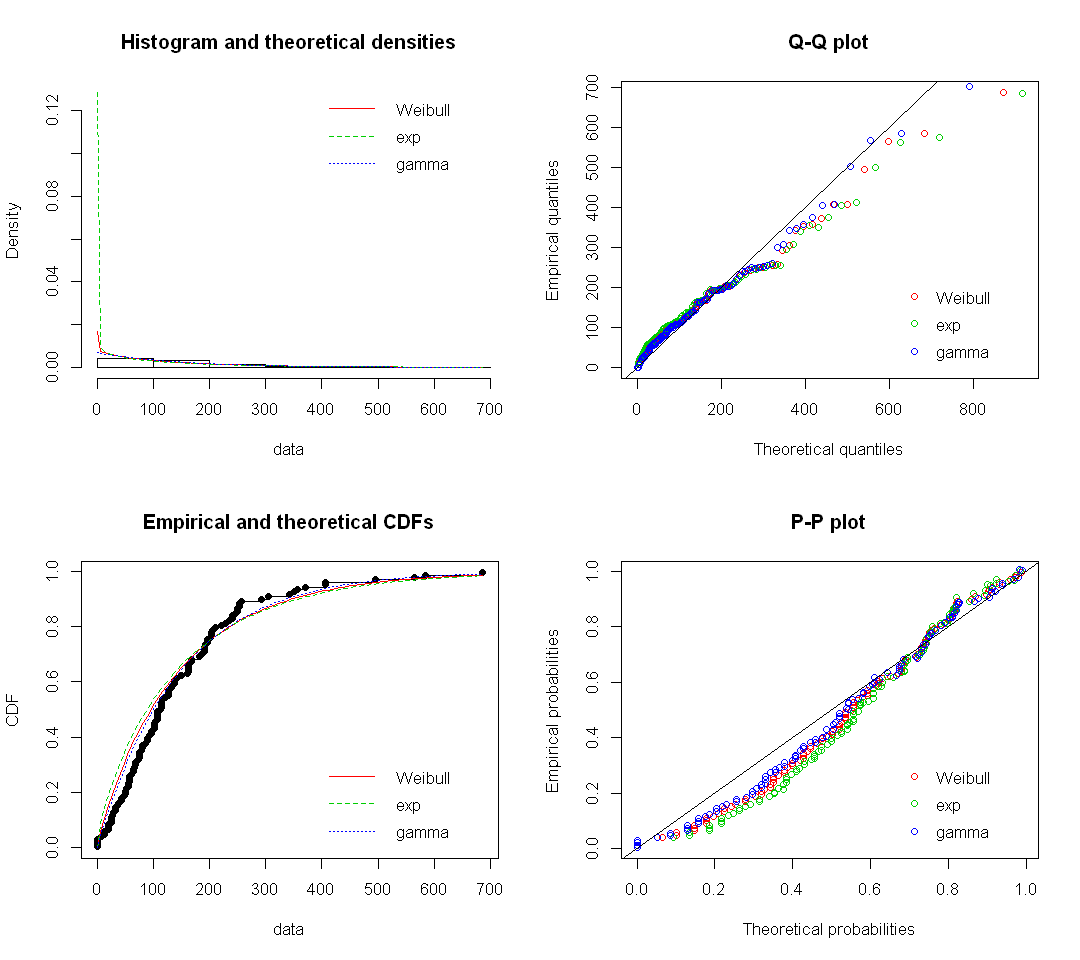

In [31]:
testDist = na.omit(max_PRCP2[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [32]:
mleGamma[2,"KStest"];mleExp[2,"KStest"];mleWB[2,"KStest"]

[1] "rejected"

[1] "not rejected"

[1] "not rejected"

In [33]:
mleGamma[3,"KStest"];mleExp[3,"KStest"];mleWB[3,"KStest"]

[1] "not rejected"

[1] "not rejected"

[1] "not rejected"

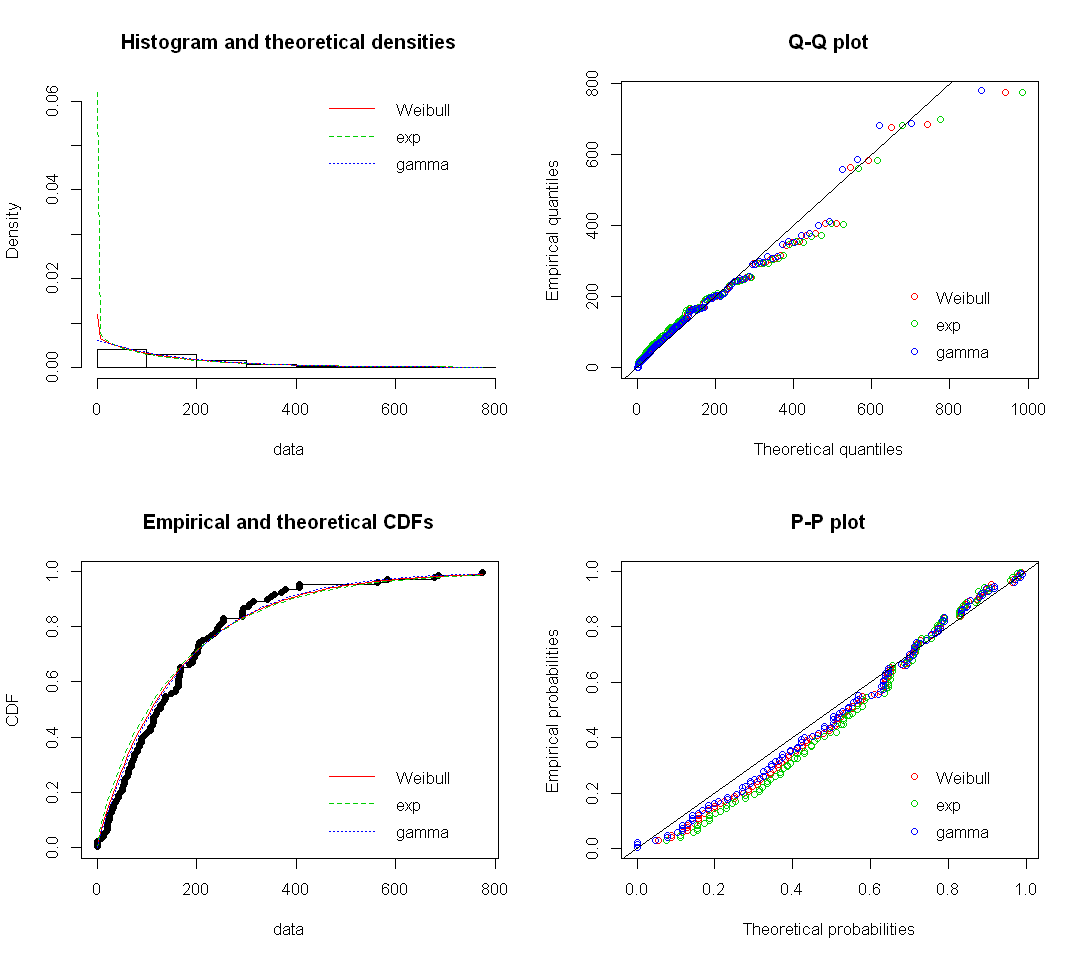

In [34]:
testDist = na.omit(max_PRCP2[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [35]:
mleGamma[45,"KStest"];mleExp[45,"KStest"];mleWB[45,"KStest"]

[1] "rejected"

[1] "rejected"

[1] "rejected"

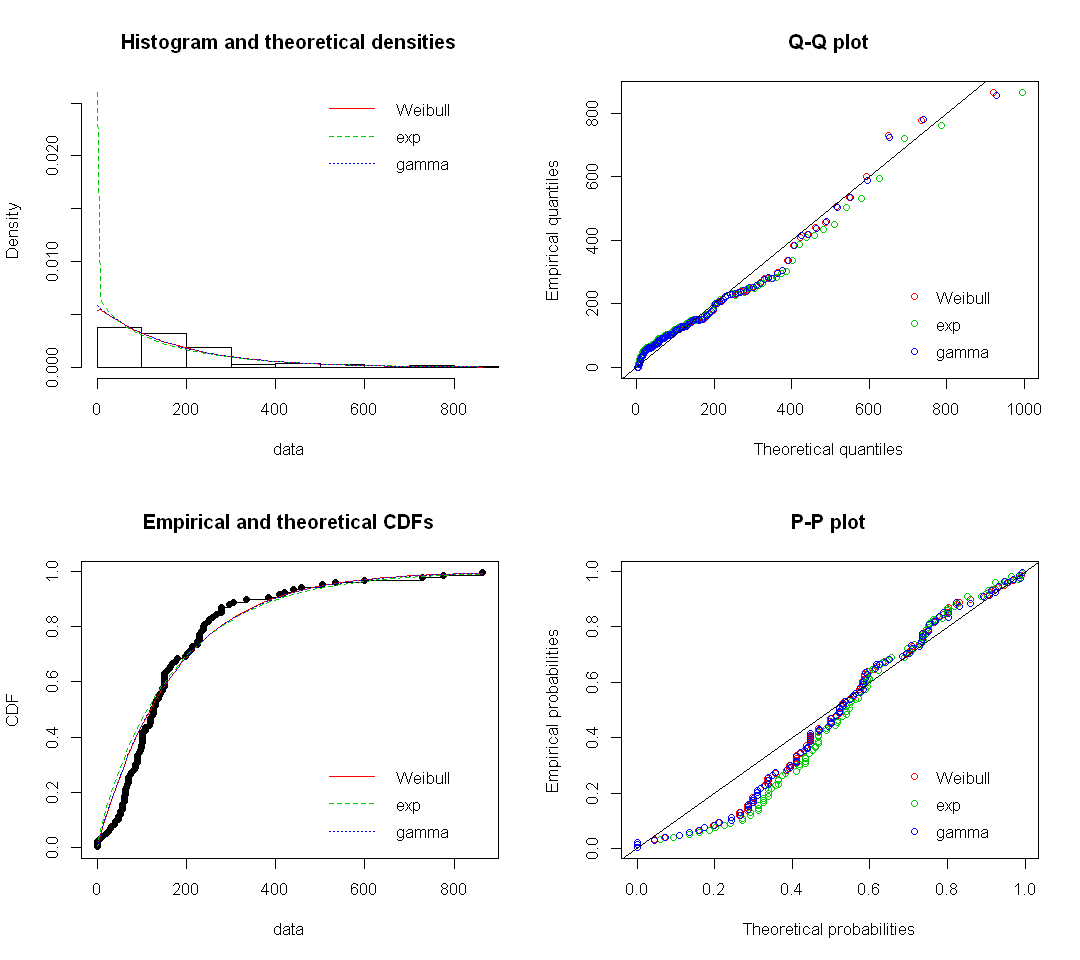

In [36]:
testDist = na.omit(max_PRCP2[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

Tried failed fits with normal distribution

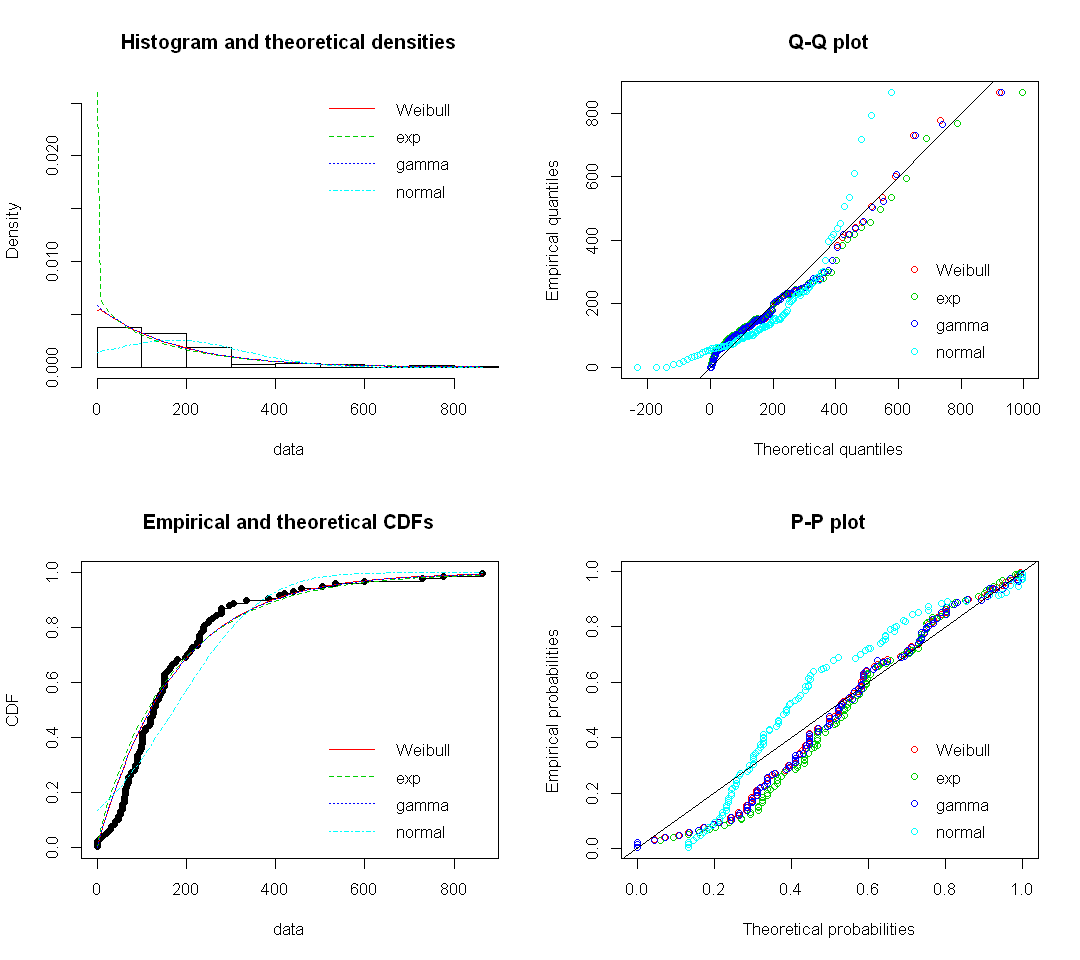

In [37]:
testDist = na.omit(max_PRCP2[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

Try good fits with normal distribution

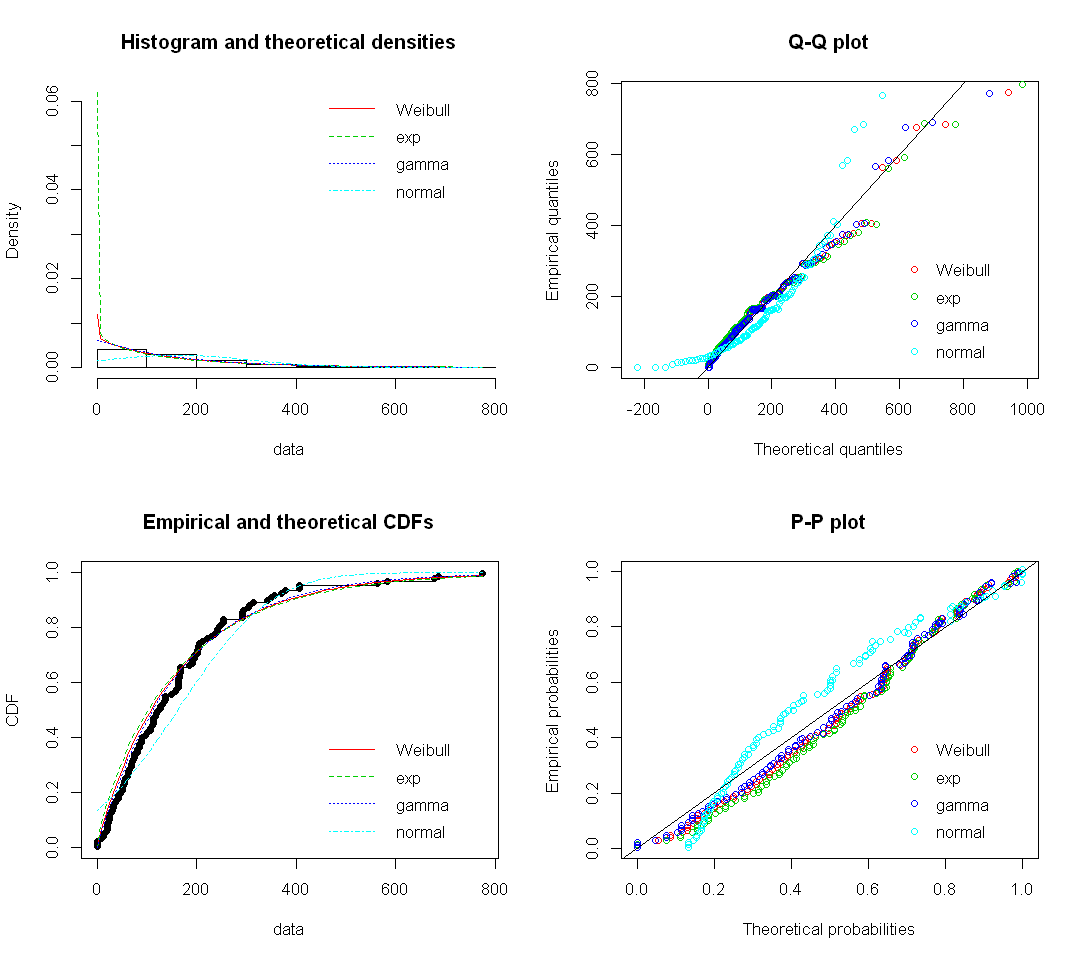

In [38]:
testDist = na.omit(max_PRCP2[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

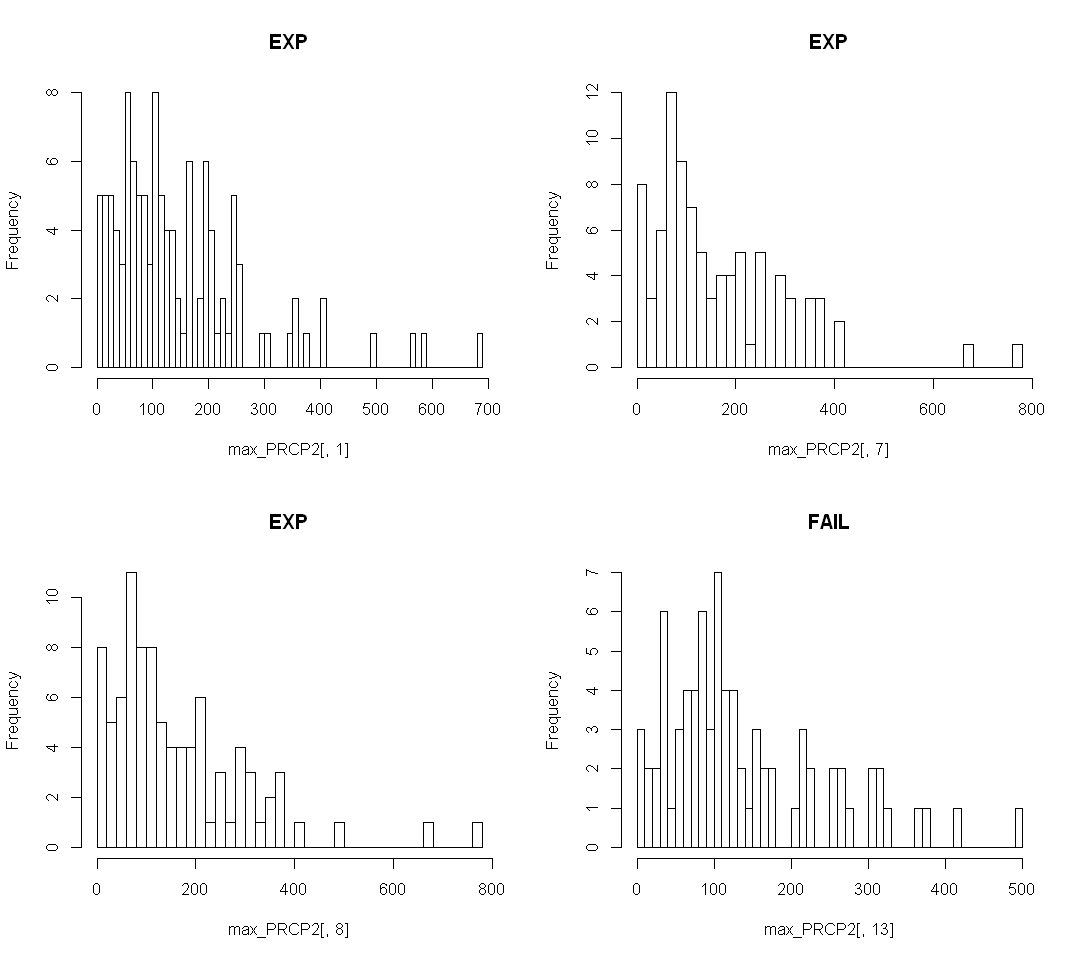

In [39]:
par(mfrow=c(2,2))
hist(max_PRCP2[,1], main = "EXP", breaks=50)
hist(max_PRCP2[,7], main = "EXP", breaks=50)
hist(max_PRCP2[,8], main = "EXP", breaks=50)
hist(max_PRCP2[,13], main = "FAIL", breaks=50)

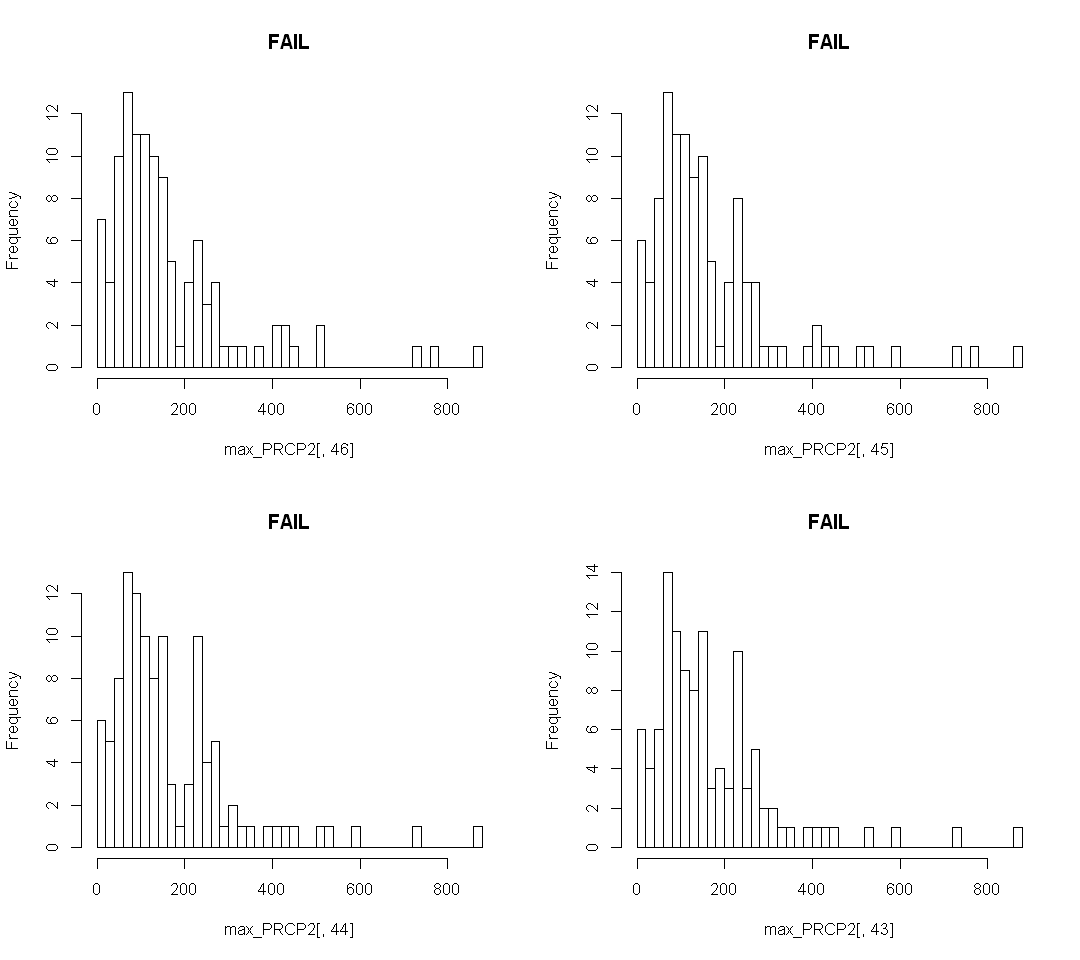

In [40]:
par(mfrow=c(2,2))
hist(max_PRCP2[,46],main = "FAIL", breaks=50)
hist(max_PRCP2[,45],main = "FAIL", breaks=50)
hist(max_PRCP2[,44],main = "FAIL", breaks=50)
hist(max_PRCP2[,43],main = "FAIL", breaks=50)

In [41]:
which(trueEst=="fail")

[1] 13 14 21 39 40 41 42 43 44 45 46 47

In [42]:
which(trueEst=="plot")

[1]   3   4   5   6  10  11  23  24  37  38  58  59  60  63  64  65  66  71  72
[20]  77  78  79  80  84  85  86  88  89  90  91  92  93  94  96  97  99 106

In [43]:
mleWB2 = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {
    
    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }
    
   WB1 = fitdist(as.vector(testDist),"weibull",method = "mge", gof="ADR")
   mleWB2[i,1] = WB1$estimate[1]
   mleWB2[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB2[i,3] = gof$ks
   mleWB2[i,4] = gof$kstest
   mleWB2[i,5] = gof$cvm
   mleWB2[i,6] = gof$cvmtest
   mleWB2[i,7] = gof$ad
   mleWB2[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [44]:
table(mleWB2[,4])


not rejected 
         108 

In [45]:
mleGamma2 = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mge", gof="ADR")
   mleGamma2[i,1] = gamma1$estimate[1]
   mleGamma2[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma2[i,3] = gof$ks
   mleGamma2[i,4] = gof$kstest
   mleGamma2[i,5] = gof$cvm
   mleGamma2[i,6] = gof$cvmtest
   mleGamma2[i,7] = gof$ad
   mleGamma2[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [46]:
table(mleGamma2[,4])


not rejected 
         108 

In [47]:
mleExp2 = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp2[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp2[i,2] = gof$ks
   mleExp2[i,3] = gof$kstest
   mleExp2[i,4] = gof$cvm
   mleExp2[i,5] = gof$cvmtest
   mleExp2[i,6] = gof$ad
   mleExp2[i,7] = gof$adtest
}

mleExp2["mean"] = 1/mleExp2$theta
mleExp2["square"] = mleExp2$theta^2 
mleExp2["var"] = 1/mleExp2$square
mleExp2["sd"] = sqrt(mleExp2$var)

In [48]:
table(mleExp2[,3])


not rejected     rejected 
          62           46 

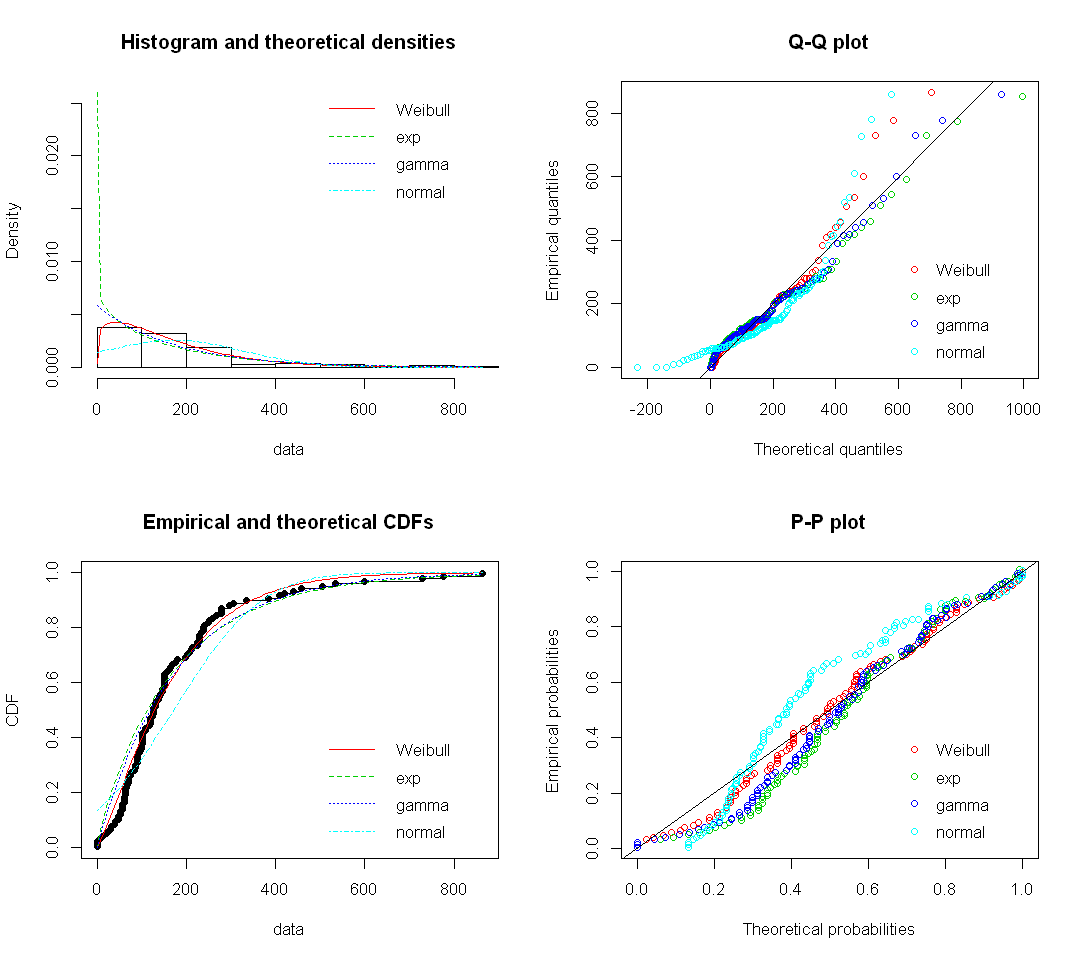

In [49]:
testDist = na.omit(max_PRCP2[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

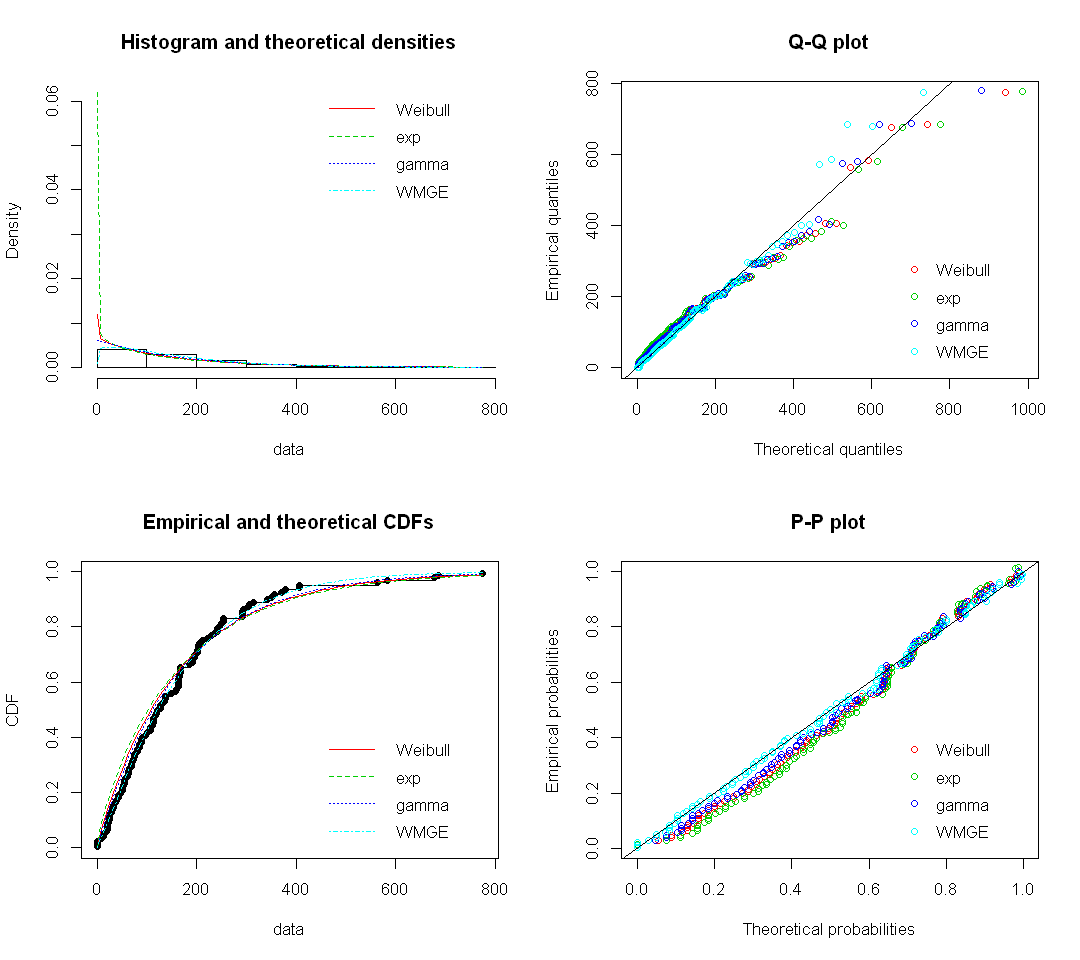

In [50]:
testDist = na.omit(max_PRCP2[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

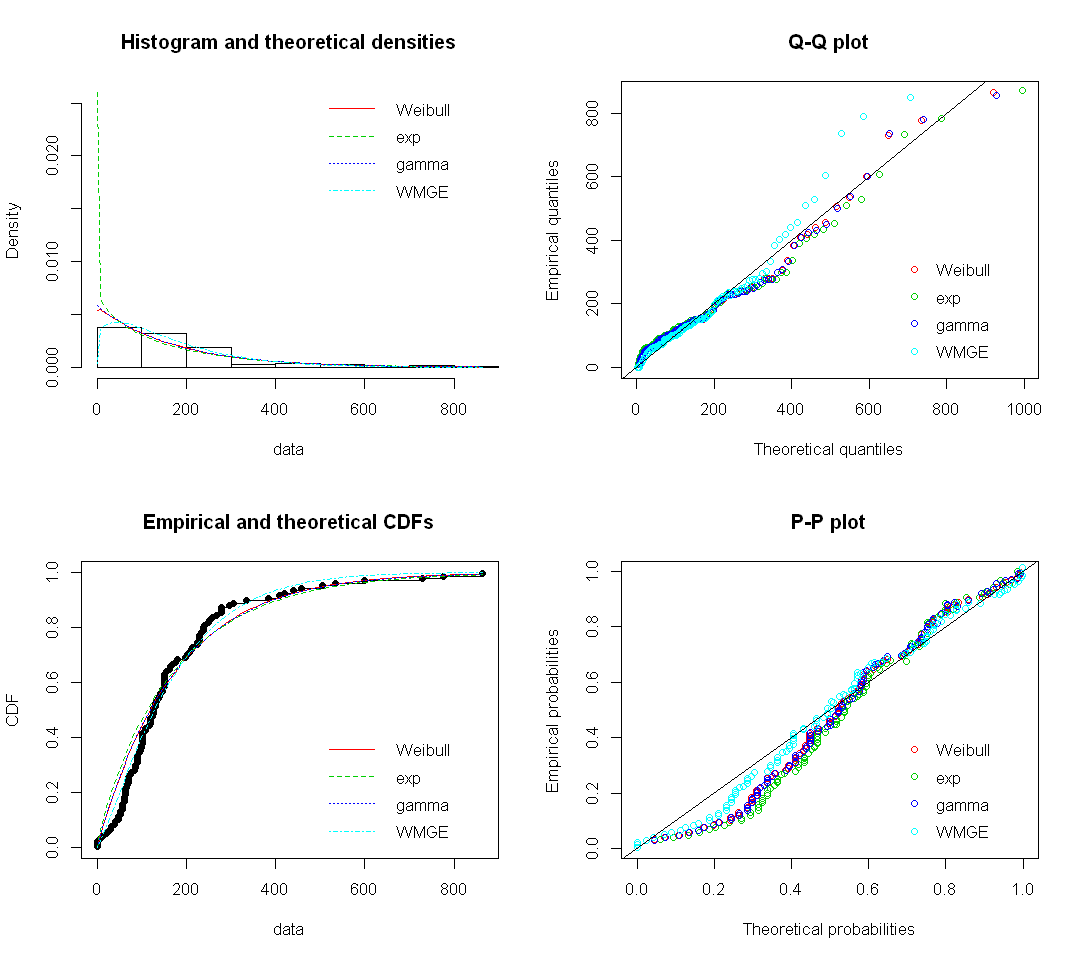

In [51]:
testDist = na.omit(max_PRCP2[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

YET AGAIN, but this time with gamma MGE as well.

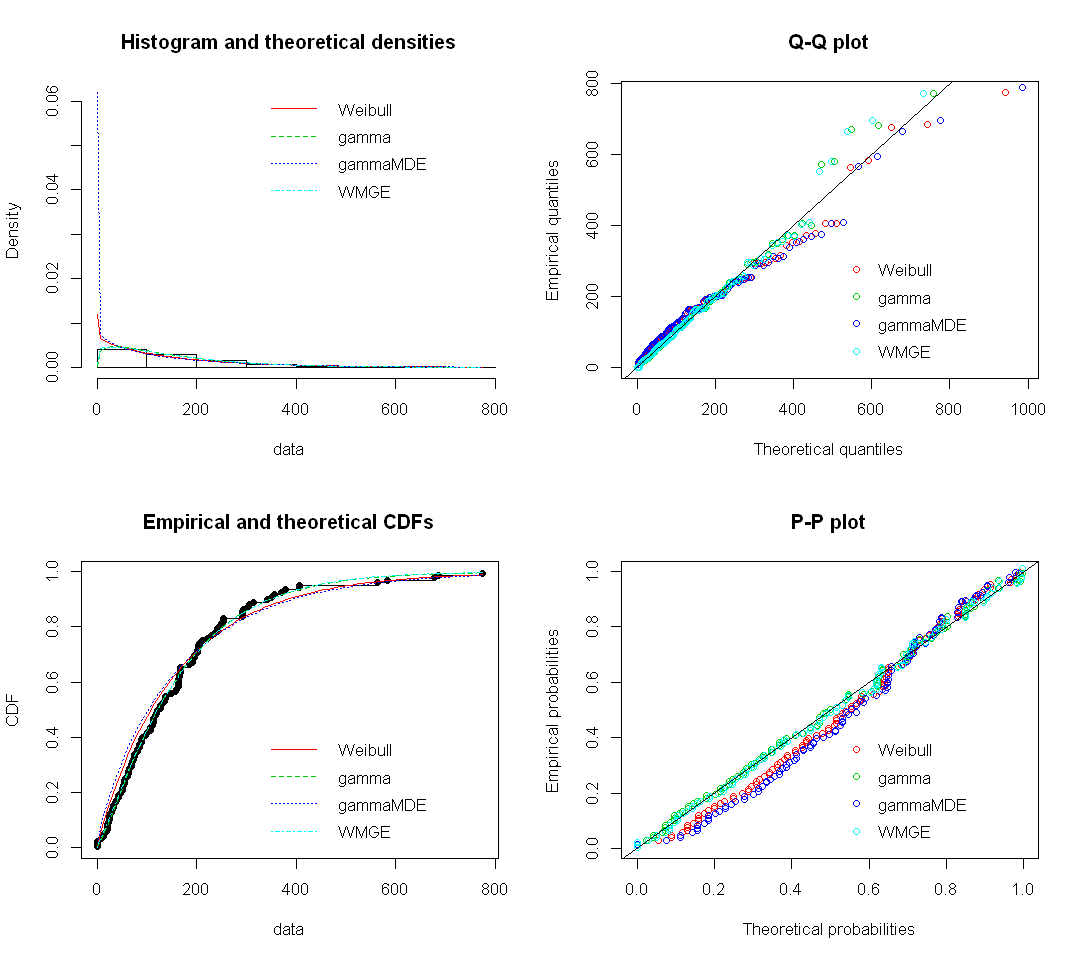

In [52]:
testDist = na.omit(max_PRCP2[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "gamma", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mge", gof="ADR")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "gamma", "gammaMDE","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

# Probabilities of Interest 

1 inch of rain approx 25.4mm, 2 inch approx 50.8, 3 inch approx 76.2mm.

Parameter estimates for frequentist probability checks are found in mleGamma2 (using maximum goodness of fit with ADR distance for right tailed data).

probability of seeing or exceeding 1 inch of rain in a 24 hour day

In [53]:
1-pgamma(254, mleGamma2[1,1], mleGamma[1,2])

[1] 0.428987

In [54]:
1-pgamma(508, mleGamma2[1,1], mleGamma[1,2])

[1] 0.1397898

In [55]:
1-pgamma(762, mleGamma2[1,1], mleGamma[1,2])

[1] 0.04236337

In [56]:
oneInch = NULL
twoInch = NULL
threeInch = NULL
for(i in 1:nrow(mleGamma2)){
    oneInch = c(oneInch,1-pgamma(254,mleGamma2[i,1],mleGamma2[i,2]))
    twoInch = c(twoInch,1-pgamma(508,mleGamma2[i,1],mleGamma2[i,2]))
    threeInch = c(threeInch,1-pgamma(762,mleGamma2[i,1],mleGamma2[i,2]))
}

In [57]:
length(oneInch)

[1] 108

In [58]:
oneInchTS = ts(oneInch, start=1907)
twoInchTS = ts(twoInch, start=1907)
threeInchTS = ts(threeInch, start=1907)

In [59]:
options(repr.plot.width=7,repr.plot.height=5) #reduces the plot sizes

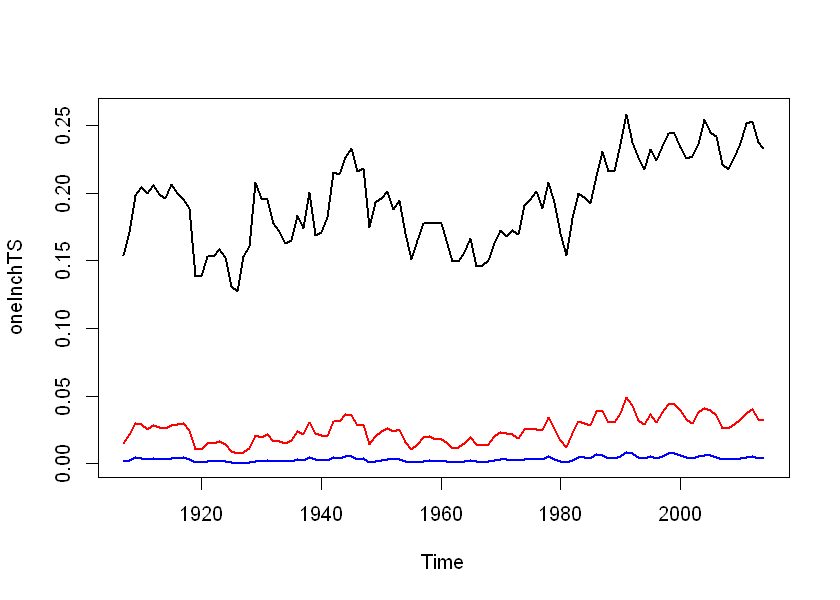

In [60]:
plot(oneInchTS, ylim=c(0,.26), lwd=2)
lines(twoInchTS, col=2, lwd=2)
lines(threeInchTS, col=4, lwd=2)

In [61]:
rollSmall = ts(runmean(oneInchTS,15),start=1907)
rollSmall2 = ts(runmean(oneInchTS,30),start=1907)
rollSmall3 = ts(runmean(oneInchTS,50),start=1907)

In [67]:
length(rollSmall)

[1] 108

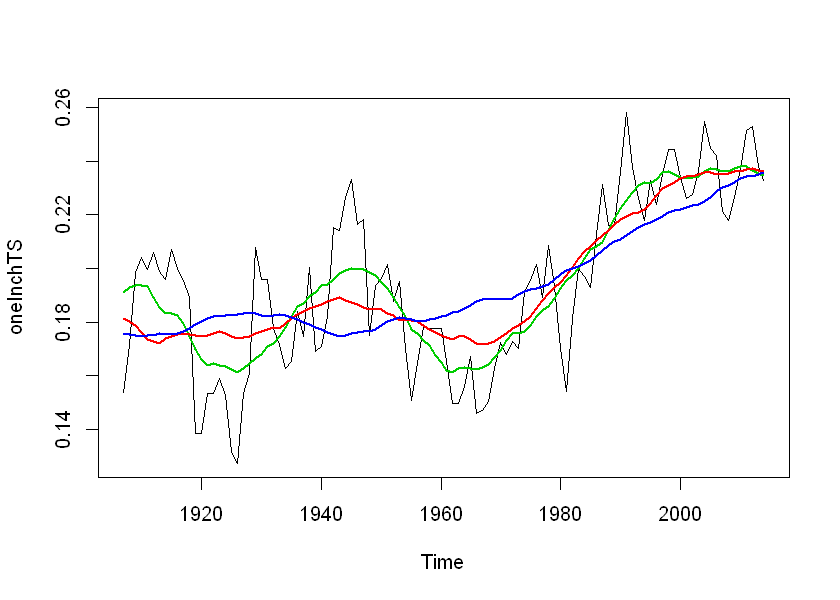

In [62]:
plot(oneInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [63]:
rollSmall = ts(runmean(twoInchTS,15),start=1907)
rollSmall2 = ts(runmean(twoInchTS,30),start=1907)
rollSmall3 = ts(runmean(twoInchTS,50),start=1907)

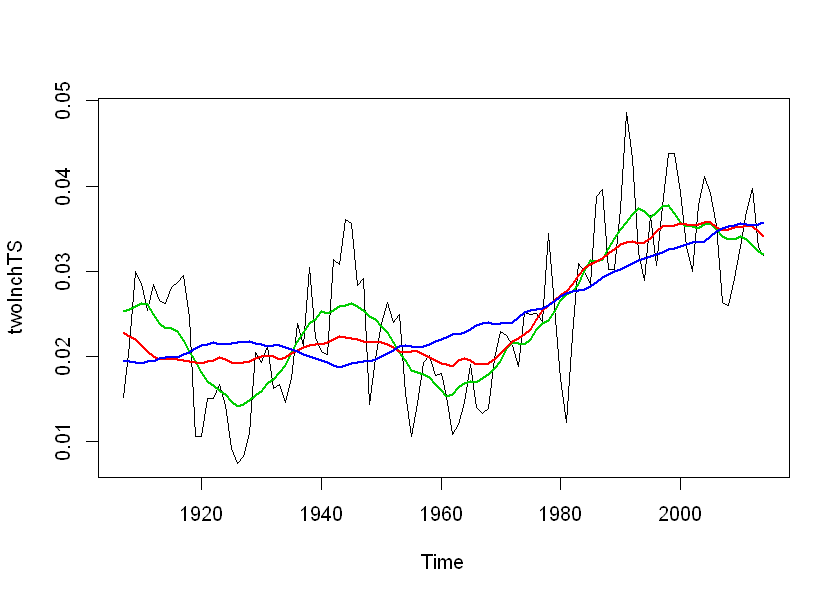

In [64]:
plot(twoInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [65]:
rollSmall = ts(runmean(threeInchTS,15),start=1907)
rollSmall2 = ts(runmean(threeInchTS,30),start=1907)
rollSmall3 = ts(runmean(threeInchTS,50),start=1907)

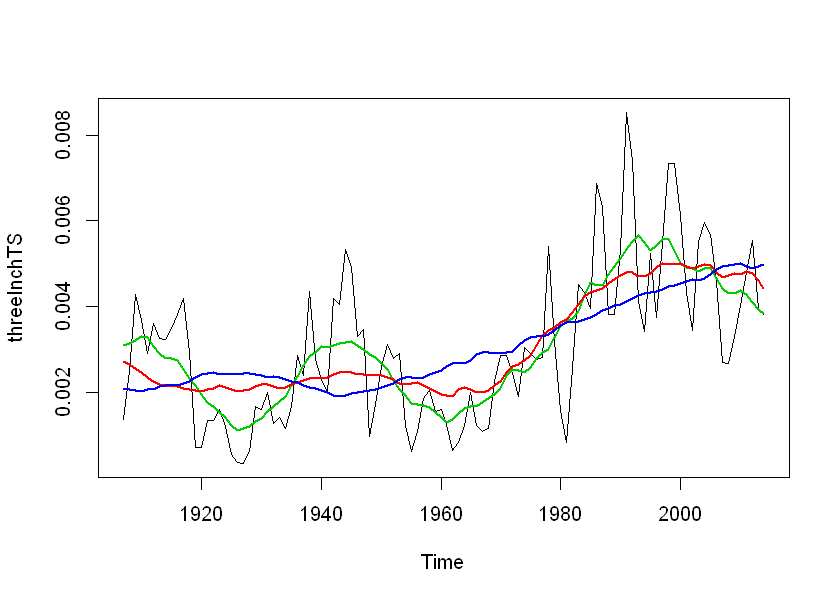

In [66]:
plot(threeInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)